In [2]:
%matplotlib inline
import pandas

In [3]:
stations = pandas.read_csv('data/austin_bikeshare_stations.csv', sep=',', delim_whitespace=False)
stations[:3]

,latitude,location,longitude,name,station_id,status
0,30.27041,(30.27041 -97.75046),-97.75046,West & 6th St.,2537,active
1,30.26452,(30.26452 -97.7712),-97.77120,Barton Springs Pool,2572,active
2,30.27595,(30.27595 -97.74739),-97.74739,ACC - Rio Grande & 12th,2545,closed


In [4]:
trips = pandas.read_csv('data/austin_bikeshare_trips.csv', sep=',', delim_whitespace=False)
trips[:3]

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
0,8.0,19:12:00,41,2565.0,Trinity & 6th Street,3.0,2536.0,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015.0
1,141.0,2:06:04,6,2570.0,South Congress & Academy,10.0,2494.0,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,2016.0
2,578.0,16:28:27,13,2498.0,Convention Center / 4th St. @ MetroRail,3.0,2538.0,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,2016.0


In [11]:
number_trips = trips.shape[0]
number_trips

649231

In [32]:
first = trips['start_time'].min()
last = trips['start_time'].max()
first, last

('2013-12-21 09:12:00', '2017-07-31 23:44:27')

In [41]:
from datetime import datetime
# 2013-12-21 09:12:00, ref http://strftime.org/
date_format = "%Y-%m-%d %H:%M:%S"
f = datetime.strptime(first, date_format)
l = datetime.strptime('2017-07-31 01:44:27', date_format)
delta = l - f 
delta.days

1317

In [46]:
"Trips per day (average): %d" % (number_trips / delta.days)

'Trips per day (average): 492'

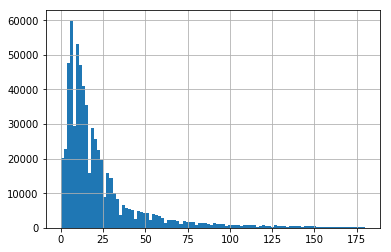

In [5]:
trips['duration_minutes'].hist(bins=100, range=(0, 3*60))

<function __main__.f>

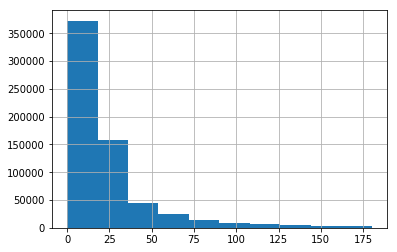

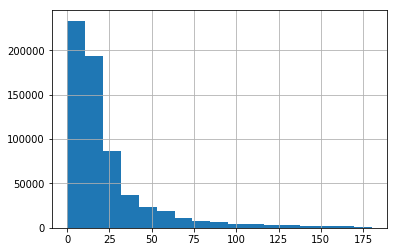

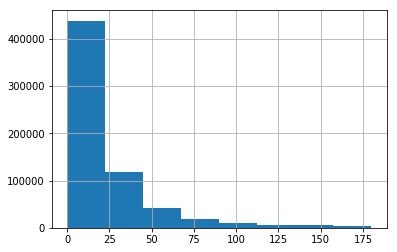

In [11]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import clear_output

def f(x):
    clear_output()
    return trips['duration_minutes'].hist(bins=x, range=(0, 3*60))

interact(f, x=10)